## Notebook for Generating Figures

In [1]:
# this code is for an elaine problem
# import sys
# sys.path.append('/Users/elainecunha/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages')

In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import random as random

In [3]:
def split_data(data, dim=2):
    '''Splits data into separate numpy arrays for 
       time, x, y, z (if dim=3) and theta. If dim=2,
       returns an empty numpy array for z.'''

    t = []
    x = []
    y = []
    z = []
    theta = []

    for row in data:
        t.append([row[0]])
        if dim==2:
            x.append(row[1:data.shape[1]:3])
            y.append(row[2:data.shape[1]:3])
            theta.append(row[3:data.shape[1]:3])
        else:
            x.append(row[1:data.shape[1]:4])
            y.append(row[2:data.shape[1]:4])
            z.append(row[3:data.shape[1]:4])
            theta.append(row[4:data.shape[1]:4])         

    return np.array(t),np.array(x),np.array(y),np.array(z),theta

In [4]:
def f(theta):
    '''Helper function for converting
       theta to a color.'''
    return 0.45*(1.+np.cos(theta))

def theta_rgb(theta):
    '''Converts theta to RGB colors.'''
    rgb=[]
    for th in theta:
        rgb.append([f(th), f(th-2.*np.pi/3.), f(th+2.*np.pi/3.)])
    return np.array(rgb)

In [5]:
def plot(t,x,y,z,theta,title):
    '''Plots data in either 2D or 3D.'''

    if len(z)==0:
        fig,ax = plt.subplots(5,1, figsize=(5,25))
    else:
        fig,ax = plt.subplots(5,1, figsize=(5,25), subplot_kw=dict(projection='3d'))

    for j,ax in enumerate(ax.flat):
        
        # format plot
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_title('Snapshot at t={}'.format(int(t[j])), fontweight="bold", fontsize=14)
        fig.tight_layout()
        
        # plot data
        if len(z)==0:
            ax.scatter(x[j], y[j], color=theta_rgb(theta[j]))
            ax.set_ylim([-2,2])
            ax.set_xlim([-2,2])
            ax.set_aspect('equal', adjustable='box')
        else:
            ax.scatter3D(x[j], y[j], z[j], color=theta_rgb(theta[j]))
            ax.set_ylim([-1,1])
            ax.set_xlim([-1,1])
            ax.set_zlim([-1,1])
            ax.set_zlabel('z', fontsize=12)
            
    return fig,ax

In [6]:
def plot_multiple(data,dim=2):
    '''Plots data in either 2D or 3D.'''
    
    fc = ['$\infty$','2','1', '0.5']
    
    if dim==2:
        fig,ax = plt.subplots(5,4, figsize=(15,20))
    else:
        fig,ax = plt.subplots(5,4, figsize=(18,20), subplot_kw=dict(projection='3d'))

    for i in range(4):
        
        d = data[i]
        inc = int(d.shape[0]/5)
        t,x,y,z,theta = split_data(d[::inc],dim=dim)
        
        for j in range(5):

            # format plot
            ax[j][i].set_xlabel('x', fontsize=14)
            ax[j][i].tick_params(axis='both', which='major', labelsize=14)
            if j==0:
                ax[j][i].set_title('r={}'.format(fc[i]), fontweight='bold', fontsize=14)
            fig.tight_layout()

            # plot data
            if dim==2:
                ax[j][i].scatter(x[j], y[j], color=theta_rgb(theta[j]), s=50)
#                 ax[j][i].set_ylim([-5,5])
#                 ax[j][i].set_xlim([-5,5])
                ax[j][i].set_aspect('equal', adjustable='box')
                if i==0:
                    ax[j][i].set_ylabel('Snapshot at t={}\ny'.format(int(t[j])), fontsize=14)
            else:
                ax[j][i].scatter3D(x[j], y[j], z[j], color=theta_rgb(theta[j]), s=50)
                ax[j][i].set_ylim([-1,1])
                ax[j][i].set_xlim([-1,1])
                ax[j][i].set_zlim([-1,1])
                ax[j][i].set_ylabel('y', fontsize=14)
                ax[j][i].set_zlabel('z', fontsize=14)
#             print(int(t[j]))
            
    return fig,ax

In [7]:
# load data
basic_swarm = np.loadtxt("./figs_data/basic_swarm.txt")
basic_swarm3d = np.loadtxt("./figs_data/basic_swarm3d.txt")

forced_swarm = []
forced_swarm3d = []
for i in range(5):
    forced_swarm.append(np.loadtxt("./figs_data/forced_swarm_F{}.txt".format(i)))
    forced_swarm3d.append(np.loadtxt("./figs_data/forced_swarm3d_F{}.txt".format(i)))
    
fc = ['-1.000000','2.000000','1.000000', '0.500000']
finite_cutoff = []
finite_cutoff3d = []
for i in fc:
    finite_cutoff.append(np.loadtxt("./figs_data/finite_swarm_r{}.txt".format(i)))
    finite_cutoff3d.append(np.loadtxt("./figs_data/finite_swarm3d_r{}.txt".format(i)))

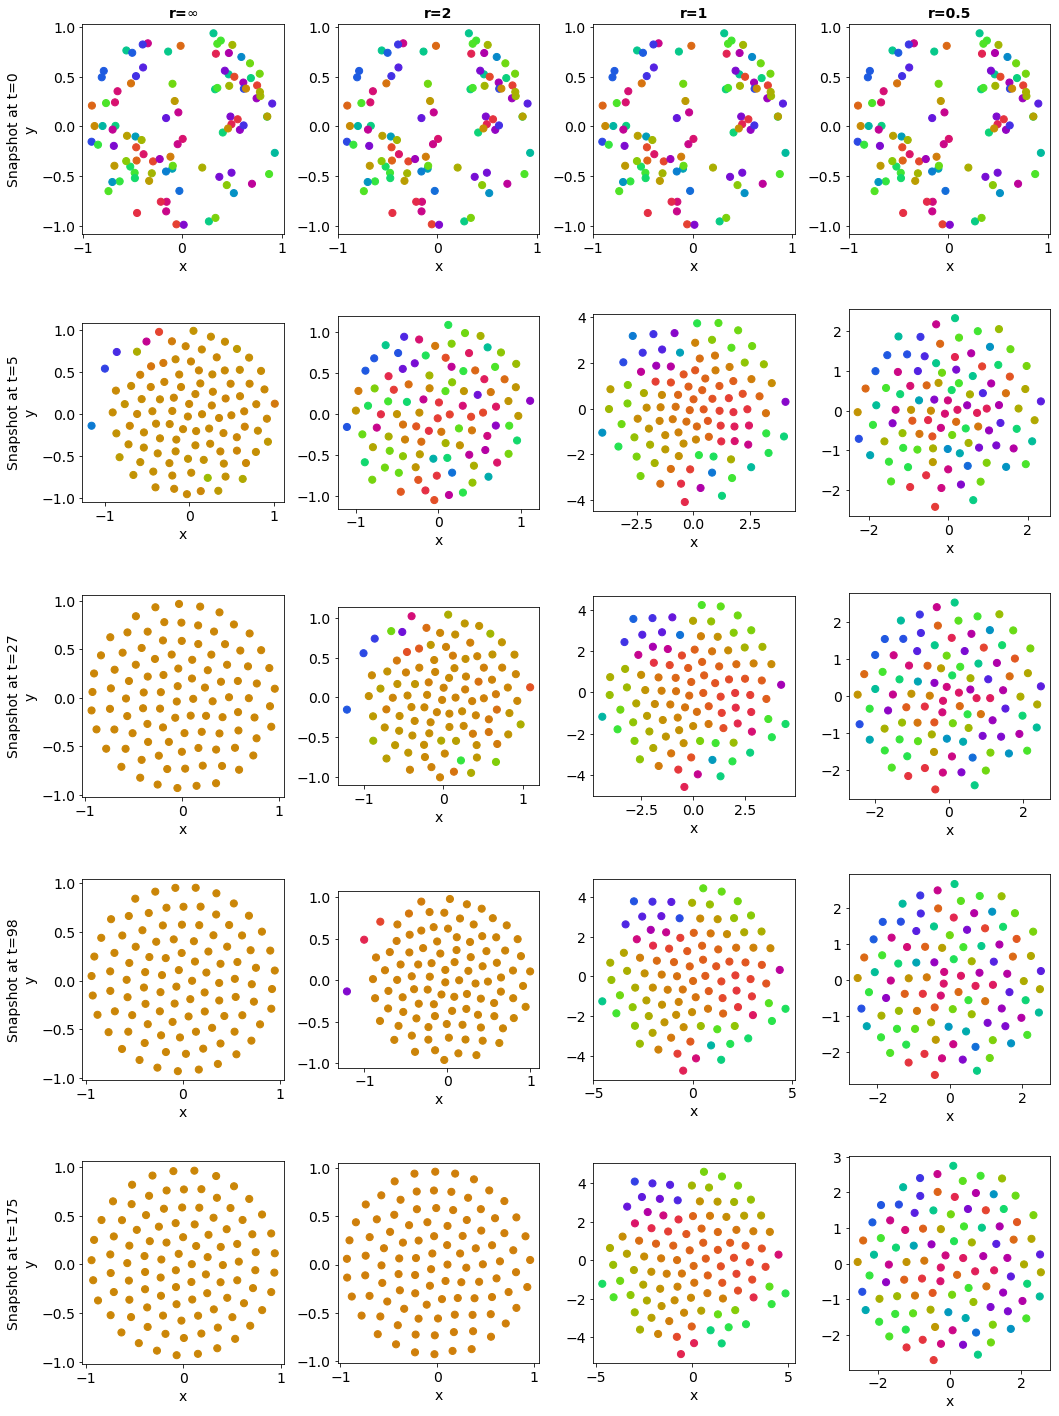

In [8]:
fig,ax = plot_multiple(finite_cutoff)#3d, dim=3)
    
plt.show()
fig.savefig('figs/finite_cutoff_att_fixed.png')

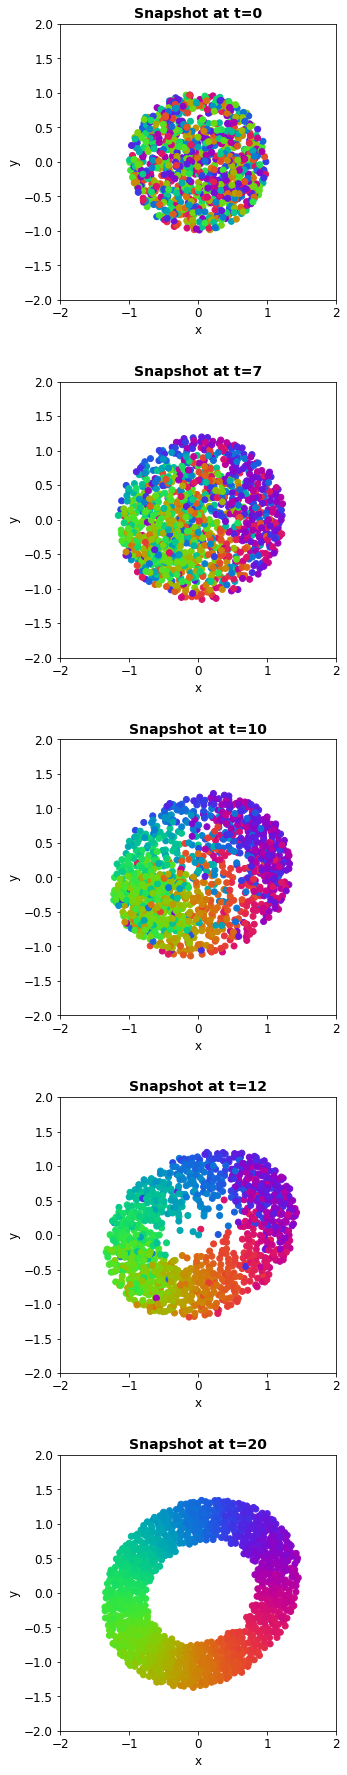

In [11]:
# process data into separate arrays
data = basic_swarm
inc = int(data.shape[0]/5)
t,x,y,z,theta = split_data(data[::inc])#, dim=3)

# plot data
fig,ax = plot(t,x,y,z,theta,'')
plt.show()
fig.savefig('figs/basic_swarm.png')

## Grid Binning Figure

In [12]:
random.seed(3)
x,y = [],[]
for i in range(30):
    r, theta = [np.sqrt(random.random())*np.sqrt(1), 2*np.pi*random.random()]
    x.append(r * np.cos(theta))
    y.append(r * np.sin(theta))

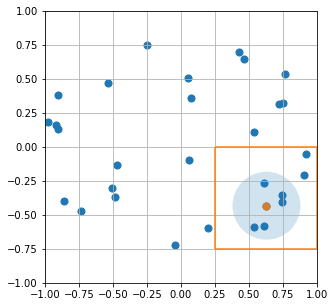

In [13]:
fig,ax = plt.subplots(1,1, figsize=(5,5))

ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.hlines([0,-0.75], [0.25,0.25], [1,1], color='C1')
ax.vlines([0.25,1], [0,0], [-0.75,-0.75], color='C1')
circle = plt.Circle((x[24],y[24]), 0.25, alpha=0.2)
ax.scatter(x,y,s=50)
ax.scatter(x[24],y[24],color='C1',s=50)
ax.add_patch(circle)

plt.show()

fig.savefig('figs/grid_binning.png')